In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import os
from util import read_json_from, write_json_to
# from data import pQTL_protein_df,pQTL_protein_ids,pQTL_protein_feature_matrix,pQTL_protein_idx_lookup 
from visualization_util import df_roc_analysis,df_precision_recall_analysis
from validation import validate_relations_in_df,full_report_calculation_by_size,simplifed_report_df,is_corum_verifiable
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
PATH_ROOT = os.getcwd().replace("\\","/").replace("/notebooks","")

In [2]:
all_corum_complex_pairs_df = pd.read_csv(f"{PATH_ROOT}/data_sources/Corum/all_corum_complex_pairs_detailed.csv")

In [3]:
all_corum_complex_pairs_df

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
0,P41182,P56524,1,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,119040.0,B-cell lymphoma 6 protein,Histone deacetylase 4
1,P41182,Q9UQL6,2,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,121978.0,B-cell lymphoma 6 protein,Histone deacetylase 5
2,P41182,Q8WUI4,3,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,102927.0,B-cell lymphoma 6 protein,Histone deacetylase 7
3,P41182,O94776,41,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,75023.0,B-cell lymphoma 6 protein,Metastasis-associated protein MTA2
4,P41182,O95983,41;585,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,32844.0,B-cell lymphoma 6 protein,Methyl-CpG-binding domain protein 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14
51267,Q12802,Q9NYL2,7593,0.116803,1,NaN,0,NaN,0,NaN,0,307550.0,91155.0,A-kinase anchor protein 13,Mitogen-activated protein kinase kinase kinase 20
51268,Q16512,Q16539,7593,0.330290,1,0.187306,1,0.454687,1,-0.321226,1,103932.0,41293.0,Serine/threonine-protein kinase N1,Mitogen-activated protein kinase 14
51269,Q16512,Q9NYL2,7593,-0.108800,1,NaN,0,NaN,0,NaN,0,103932.0,91155.0,Serine/threonine-protein kinase N1,Mitogen-activated protein kinase kinase kinase 20


In [4]:
all_corum_complex_pairs_df_filtered = all_corum_complex_pairs_df.loc[(all_corum_complex_pairs_df['proHD_validatable'] == 1)&
                                                                     (all_corum_complex_pairs_df['pQTL_protein_validatable'] == 1)&
                                                                     (all_corum_complex_pairs_df['protein_consensus_validatable'] == 1)&
                                                                     (all_corum_complex_pairs_df['pQTL_rna_seq_validatable'] == 1)
                                                                    ]
all_corum_complex_pairs_df_filtered

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
181,O95347,Q15021,10;157;159;167,0.714277,1,0.950074,1,0.995011,1,0.624718,1,135656.0,157182.0,Structural maintenance of chromosomes protein 2,Condensin complex subunit 1
183,O95347,Q9NTJ3,10;49;157;159;160;167;353;5239,0.800414,1,0.989900,1,0.694113,1,0.846558,1,135656.0,147182.0,Structural maintenance of chromosomes protein 2,Structural maintenance of chromosomes protein 4
184,O95347,O60264,49,0.432262,1,0.788519,1,0.022887,1,0.422228,1,135656.0,121905.0,Structural maintenance of chromosomes protein 2,SWI/SNF-related matrix-associated actin-depend...
186,O95347,Q13547,49,0.334320,1,0.736268,1,-0.603197,1,0.598195,1,135656.0,55103.0,Structural maintenance of chromosomes protein 2,Histone deacetylase 1
187,O95347,Q96ST3,49,0.488608,1,0.610248,1,0.450531,1,0.315705,1,135656.0,145175.0,Structural maintenance of chromosomes protein 2,Paired amphipathic helix protein Sin3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51262,P46734,Q16512,7593,0.316577,1,-0.125972,1,0.094498,1,0.232387,1,39318.0,103932.0,Dual specificity mitogen-activated protein kin...,Serine/threonine-protein kinase N1
51263,P46734,Q16539,7593,0.065092,1,-0.236032,1,0.219320,1,-0.041234,1,39318.0,41293.0,Dual specificity mitogen-activated protein kin...,Mitogen-activated protein kinase 14
51265,Q12802,Q16512,7593,-0.269267,1,0.114108,1,0.950642,1,0.002431,1,307550.0,103932.0,A-kinase anchor protein 13,Serine/threonine-protein kinase N1
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14


In [5]:
all_complexes_involved = all_corum_complex_pairs_df_filtered['found_in'].to_numpy()
all_complexes_involved = list(map(lambda x: x.split(';'), all_complexes_involved))
all_complexes_involved = [int(c_id) for com in all_complexes_involved for c_id in com]
all_complexes_involved = np.unique(all_complexes_involved)

In [6]:
com_corr = {}
for idx,row in all_corum_complex_pairs_df_filtered.iterrows():
    com_involved = row['found_in'].split(";")
    for com in com_involved:
        if not com in com_corr:
            com_corr[com] = {'proHD':[],'pQTL_protein':[],'pQTL_rna_seq':[],'protein_consensus':[]}
        com_corr[com]['proHD'].append(row['proHD_corr'])
        com_corr[com]['pQTL_protein'].append(row['pQTL_protein_corr'])
        com_corr[com]['pQTL_rna_seq'].append(row['pQTL_rna_seq_corr'])
        com_corr[com]['protein_consensus'].append(row['protein_consensus_corr'])

In [7]:
com_corr

{'10': {'proHD': [0.7142768209032647, 0.8004136424430499, 0.6523017877377274],
  'pQTL_protein': [0.9500739116121404, 0.9898995010867612, 0.9471542151194072],
  'pQTL_rna_seq': [0.6247177073041454, 0.846558055977495, 0.4977432969164426],
  'protein_consensus': [0.9950112880720544,
   0.6941129123707582,
   0.9907527887486623]},
 '157': {'proHD': [0.7142768209032647, 0.8004136424430499, 0.6523017877377274],
  'pQTL_protein': [0.9500739116121404, 0.9898995010867612, 0.9471542151194072],
  'pQTL_rna_seq': [0.6247177073041454, 0.846558055977495, 0.4977432969164426],
  'protein_consensus': [0.9950112880720544,
   0.6941129123707582,
   0.9907527887486623]},
 '159': {'proHD': [0.7142768209032647,
   0.8004136424430499,
   0.2716926307502959,
   0.6523017877377274,
   0.27153930939788634,
   0.3707066676368521],
  'pQTL_protein': [0.9500739116121404,
   0.9898995010867612,
   0.303223058044657,
   0.9471542151194072,
   0.293416479823227,
   0.2746458517414673],
  'pQTL_rna_seq': [0.624717707

In [8]:
complex_id_to_subunits_lookup = read_json_from(f"{PATH_ROOT}/data_sources/Corum/all_complexes_id_to_subunits.json")
tup_list = []
for com in com_corr:
    com_observed_pairs = len(com_corr[com]['proHD'])
    com_subunit_amount = len(complex_id_to_subunits_lookup[com])
    com_total_pair_amount = (com_subunit_amount*(com_subunit_amount-1)) / 2 # n choose 2
    com_observed_fraction = com_observed_pairs/com_total_pair_amount
    com_proHD_mean = np.mean(com_corr[com]['proHD'])
    com_proHD_median = np.median(com_corr[com]['proHD'])
    com_pQTL_protein_mean = np.mean(com_corr[com]['pQTL_protein'])
    com_pQTL_protein_median = np.median(com_corr[com]['pQTL_protein'])
    com_pQTL_rna_seq_mean = np.mean(com_corr[com]['pQTL_rna_seq'])
    com_pQTL_rna_seq_median = np.median(com_corr[com]['pQTL_rna_seq'])
    com_protein_consensus_mean = np.mean(com_corr[com]['protein_consensus'])
    com_protein_consensus_median = np.median(com_corr[com]['protein_consensus'])
    tup_list.append((com,com_observed_pairs,com_subunit_amount,com_total_pair_amount,com_observed_fraction,
                    com_proHD_mean,com_proHD_median,com_pQTL_protein_mean,com_pQTL_protein_median,
                    com_pQTL_rna_seq_mean,com_pQTL_rna_seq_median,com_protein_consensus_mean,com_protein_consensus_median))
col_names = ['complex_id','pairs_observed','subunit_amount','total_pairs_possible','observed_fraction',
            'proHD_mean','proHD_median','pQTL_protein_mean','pQTL_protein_median',
            'pQTL_rna_seq_mean','pQTL_rna_seq_median','protein_consensus_mean','protein_consensus_median']
com_corr_df = pd.DataFrame(columns=col_names,data=tup_list)
com_corr_df

,complex_id,pairs_observed,subunit_amount,total_pairs_possible,observed_fraction,proHD_mean,proHD_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median,protein_consensus_mean,protein_consensus_median
0,10,3,5,10.0,0.300000,0.722331,0.714277,0.962376,0.950074,0.656340,0.624718,0.893292,0.990753
1,157,3,5,10.0,0.300000,0.722331,0.714277,0.962376,0.950074,0.656340,0.624718,0.893292,0.990753
2,159,6,7,21.0,0.285714,0.513488,0.511504,0.626402,0.625189,0.545848,0.561231,0.518947,0.482808
3,167,3,5,10.0,0.300000,0.722331,0.714277,0.962376,0.950074,0.656340,0.624718,0.893292,0.990753
4,49,10,7,21.0,0.476190,0.456834,0.442780,0.734848,0.733118,0.452368,0.412835,0.188490,0.247760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,7292,10,5,10.0,1.000000,0.254767,0.269430,0.467848,0.477828,0.439287,0.405081,0.228485,0.185192
1170,7313,1,2,1.0,1.000000,1.000000,1.000000,0.085373,0.085373,0.148642,0.148642,0.752621,0.752621
1171,7483,1,4,6.0,0.166667,0.070846,0.070846,0.199919,0.199919,-0.180566,-0.180566,-0.183300,-0.183300
1172,7555,3,4,6.0,0.500000,0.354829,0.586775,0.659237,0.663673,0.242307,0.348433,0.402839,0.378535


In [26]:
com_names = []
complex_id_to_name = read_json_from(f'{PATH_ROOT}/data_sources/Corum/all_complexes_id_to_name.json')
for idx,row in com_corr_df.iterrows():
    com_id = row['complex_id']
    com_name = complex_id_to_name[com_id]
    com_names.append(com_name)
com_names

['Condensin I complex',
 'Condensin I complex',
 'Condensin I-PARP-1-XRCC1 complex',
 'Condensin I complex',
 'DNMT3B complex',
 'Condensin II',
 'DNA ligase IV-condensin complex',
 'CAP(C)-CAP(E) complex',
 'BLOC-2 (biogenesis of lysosome-related organelles complex 2)',
 'BLOC1-BLOC2 complex',
 'Kaiso-NCOR complex',
 'Emerin complex 32',
 'BLOC-1 (biogenesis of lysosome-related organelles complex 1)',
 'AP3-BLOC1 complex',
 'BORC complex',
 'dysbindin-Snapin-BLOS2 complex',
 'pallidin-Cappuccino-BLOS1 complex',
 'Dysbindin 1-A-DNA-PK-complex',
 'Arp2/3 protein complex',
 'PA28 complex',
 'PA28-20S proteasome',
 'PA700-20S-PA28 complex',
 'PA700 complex',
 '26S proteasome',
 'BP-SMAD complex',
 'SNARE complex (RINT1, ZW10, p31, Stx18)',
 'SNARE complex (RINT1, ZW10, p31)',
 'Prefoldin complex',
 'Prefoldin complex',
 'CCT-Prefoldin complex',
 'CCT-Prefoldin complex, testis specific',
 'URI complex (Unconventional prefoldin RPB5 Interactor)',
 'Kinase maturation complex 1',
 'AP1 adapto

In [27]:
com_corr_df['complex_name'] = com_names
com_corr_df

,complex_id,pairs_observed,subunit_amount,total_pairs_possible,observed_fraction,proHD_mean,proHD_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median,protein_consensus_mean,protein_consensus_median,complex_mass,complex_name
0,10,3,5,10.0,0.300000,0.722331,0.714277,0.962376,0.950074,0.656340,0.624718,0.893292,0.990753,636917.0,Condensin I complex
1,157,3,5,10.0,0.300000,0.722331,0.714277,0.962376,0.950074,0.656340,0.624718,0.893292,0.990753,636917.0,Condensin I complex
2,159,6,7,21.0,0.285714,0.513488,0.511504,0.626402,0.625189,0.545848,0.561231,0.518947,0.482808,819478.0,Condensin I-PARP-1-XRCC1 complex
3,167,3,5,10.0,0.300000,0.722331,0.714277,0.962376,0.950074,0.656340,0.624718,0.893292,0.990753,636917.0,Condensin I complex
4,49,10,7,21.0,0.476190,0.456834,0.442780,0.734848,0.733118,0.452368,0.412835,0.188490,0.247760,840653.0,DNMT3B complex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,7292,10,5,10.0,1.000000,0.254767,0.269430,0.467848,0.477828,0.439287,0.405081,0.228485,0.185192,260879.0,EIF2B1-EIF2B2-EIF2B3-EIF2B4-EIF2B5 complex
1170,7313,1,2,1.0,1.000000,1.000000,1.000000,0.085373,0.085373,0.148642,0.148642,0.752621,0.752621,225213.0,ESYT1-ESYT2 complex
1171,7483,1,4,6.0,0.166667,0.070846,0.070846,0.199919,0.199919,-0.180566,-0.180566,-0.183300,-0.183300,188662.0,ARF1-ARL1-PKD2-ARFIP2 complex
1172,7555,3,4,6.0,0.500000,0.354829,0.586775,0.659237,0.663673,0.242307,0.348433,0.402839,0.378535,99052.0,KEOPS complex


In [28]:
com_corr_df_reorganized = com_corr_df[['complex_id','complex_name','subunit_amount','complex_mass','observed_fraction',
                                      'proHD_mean','proHD_median','protein_consensus_mean','protein_consensus_median',
                                      'pQTL_protein_mean','pQTL_protein_median','pQTL_rna_seq_mean','pQTL_rna_seq_median']]
com_corr_df_reorganized

,complex_id,complex_name,subunit_amount,complex_mass,observed_fraction,proHD_mean,proHD_median,protein_consensus_mean,protein_consensus_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median
0,10,Condensin I complex,5,636917.0,0.300000,0.722331,0.714277,0.893292,0.990753,0.962376,0.950074,0.656340,0.624718
1,157,Condensin I complex,5,636917.0,0.300000,0.722331,0.714277,0.893292,0.990753,0.962376,0.950074,0.656340,0.624718
2,159,Condensin I-PARP-1-XRCC1 complex,7,819478.0,0.285714,0.513488,0.511504,0.518947,0.482808,0.626402,0.625189,0.545848,0.561231
3,167,Condensin I complex,5,636917.0,0.300000,0.722331,0.714277,0.893292,0.990753,0.962376,0.950074,0.656340,0.624718
4,49,DNMT3B complex,7,840653.0,0.476190,0.456834,0.442780,0.188490,0.247760,0.734848,0.733118,0.452368,0.412835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,7292,EIF2B1-EIF2B2-EIF2B3-EIF2B4-EIF2B5 complex,5,260879.0,1.000000,0.254767,0.269430,0.228485,0.185192,0.467848,0.477828,0.439287,0.405081
1170,7313,ESYT1-ESYT2 complex,2,225213.0,1.000000,1.000000,1.000000,0.752621,0.752621,0.085373,0.085373,0.148642,0.148642
1171,7483,ARF1-ARL1-PKD2-ARFIP2 complex,4,188662.0,0.166667,0.070846,0.070846,-0.183300,-0.183300,0.199919,0.199919,-0.180566,-0.180566
1172,7555,KEOPS complex,4,99052.0,0.500000,0.354829,0.586775,0.402839,0.378535,0.659237,0.663673,0.242307,0.348433


In [11]:
com_corr_df.describe()

,pairs_observed,subunit_amount,total_pairs_possible,observed_fraction,proHD_mean,proHD_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median,protein_consensus_mean,protein_consensus_median,complex_mass
count,1174.000000,1174.000000,1174.000000,1174.000000,1166.000000,1166.000000,1174.000000,1174.000000,1174.000000,1174.000000,1100.000000,1100.000000,1.167000e+03
mean,20.549404,6.247871,49.359455,0.490665,0.323009,0.316793,0.337561,0.330998,0.241488,0.240420,0.217409,0.224720,4.559927e+05
std,185.493358,8.123244,379.979441,0.324932,0.284406,0.292980,0.306897,0.318729,0.275258,0.292012,0.367933,0.385914,5.195944e+05
min,1.000000,2.000000,1.000000,0.003173,-0.944595,-0.944595,-0.583247,-0.583247,-0.608409,-0.608409,-1.000000,-1.000000,2.071100e+04
25%,1.000000,3.000000,3.000000,0.276341,0.140111,0.133907,0.122398,0.097869,0.063119,0.048662,0.009069,-0.006960,1.763235e+05
50%,3.000000,4.000000,6.000000,0.333333,0.340524,0.340900,0.307500,0.290776,0.226324,0.234169,0.227396,0.251578,3.050130e+05
75%,6.000000,7.000000,21.000000,0.750000,0.522689,0.530099,0.543355,0.560001,0.439105,0.462991,0.456607,0.489098,5.570740e+05
max,4753.000000,143.000000,10153.000000,1.000000,1.000000,1.000000,0.989900,0.990706,0.869462,0.869462,1.000000,1.000000,9.706978e+06


In [33]:
com_corr_df_mostly_observed = com_corr_df_reorganized[com_corr_df_reorganized['observed_fraction'] >= 0.50]
com_corr_df_mostly_observed

,complex_id,complex_name,subunit_amount,complex_mass,observed_fraction,proHD_mean,proHD_median,protein_consensus_mean,protein_consensus_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median
7,5239,CAP(C)-CAP(E) complex,2,282838.0,1.000000,0.800414,0.800414,0.694113,0.694113,0.989900,0.989900,0.846558,0.846558
15,6416,dysbindin-Snapin-BLOS2 complex,3,70328.0,1.000000,0.122544,0.112722,-0.136756,0.160806,0.195375,0.235443,0.307446,0.386334
17,7217,Dysbindin 1-A-DNA-PK-complex,4,661130.0,0.500000,0.276224,0.209463,-0.279180,-0.469580,0.165251,-0.190574,0.160275,-0.046821
18,27,Arp2/3 protein complex,7,223949.0,0.714286,0.831628,0.871996,0.714102,0.712811,0.925994,0.947642,0.233063,0.254604
19,30,PA28 complex,2,56125.0,1.000000,0.733164,0.733164,0.899015,0.899015,0.746332,0.746332,0.464861,0.464861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,7291,EIF2B2-EIF2B3-EIF2B4-EIF2B5 complex,4,227167.0,1.000000,0.302822,0.308175,0.206175,0.185192,0.510138,0.497632,0.392836,0.381127
1169,7292,EIF2B1-EIF2B2-EIF2B3-EIF2B4-EIF2B5 complex,5,260879.0,1.000000,0.254767,0.269430,0.228485,0.185192,0.467848,0.477828,0.439287,0.405081
1170,7313,ESYT1-ESYT2 complex,2,225213.0,1.000000,1.000000,1.000000,0.752621,0.752621,0.085373,0.085373,0.148642,0.148642
1172,7555,KEOPS complex,4,99052.0,0.500000,0.354829,0.586775,0.402839,0.378535,0.659237,0.663673,0.242307,0.348433


In [34]:
com_corr_df_mostly_observed.describe()

,subunit_amount,complex_mass,observed_fraction,proHD_mean,proHD_median,protein_consensus_mean,protein_consensus_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median
count,476.000000,4.760000e+02,476.000000,472.000000,472.000000,452.000000,452.000000,476.000000,476.000000,476.000000,476.000000
mean,5.392857,3.499648e+05,0.833616,0.334250,0.328302,0.198353,0.195672,0.353617,0.346376,0.254101,0.254059
std,7.679849,3.562872e+05,0.206524,0.275098,0.292511,0.361208,0.376789,0.303729,0.323138,0.268457,0.294531
min,2.000000,2.071100e+04,0.500000,-0.823094,-0.823094,-1.000000,-1.000000,-0.513120,-0.513120,-0.562001,-0.562001
25%,2.000000,1.498290e+05,0.600000,0.144718,0.145162,0.015698,-0.061282,0.155930,0.100015,0.089790,0.073775
50%,4.000000,2.382970e+05,1.000000,0.340107,0.344571,0.231127,0.235190,0.322777,0.310153,0.231046,0.253479
75%,5.000000,4.235190e+05,1.000000,0.529141,0.559568,0.400891,0.418898,0.550168,0.594814,0.446754,0.484464
max,104.000000,3.857170e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.989900,0.990706,0.846558,0.846558


In [ ]:
com_corr_df_mostly_observed

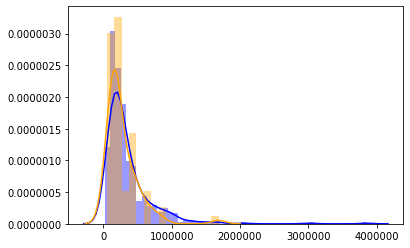

In [21]:
from sklearn import preprocessing
mostly_observed_masses = com_corr_df_mostly_observed['complex_mass'].to_numpy()
mostly_observed_masses_low_corr = com_corr_df_mostly_observed.loc[(com_corr_df_mostly_observed['proHD_mean'] <= 0.25)&
                                (com_corr_df_mostly_observed['pQTL_protein_mean'] <= 0.25)&
                                (com_corr_df_mostly_observed['protein_consensus_mean'] <= 0.25)]['complex_mass'].to_numpy()
# min_max_scaler = preprocessing.MinMaxScaler()
# mostly_observed_masses = min_max_scaler.fit_transform(mostly_observed_masses.reshape(-1,1))
# mostly_observed_masses_low_corr = min_max_scaler.fit_transform(mostly_observed_masses_low_corr.reshape(-1,1))
sns.distplot(mostly_observed_masses,color='blue')
sns.distplot(mostly_observed_masses_low_corr,color='orange')

In [35]:
com_corr_df_mostly_observed.loc[(com_corr_df_mostly_observed['proHD_mean'] <= 0.25)&
                                (com_corr_df_mostly_observed['pQTL_protein_mean'] <= 0.25)&
                                (com_corr_df_mostly_observed['protein_consensus_mean'] <= 0.25)].describe()

,subunit_amount,complex_mass,observed_fraction,proHD_mean,proHD_median,protein_consensus_mean,protein_consensus_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median
count,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,3.628571,2.750986e+05,0.879295,0.024450,-0.002666,-0.080968,-0.093171,0.045614,0.027913,0.154380,0.134152
std,2.079377,2.481015e+05,0.192938,0.217709,0.235177,0.279933,0.314539,0.159040,0.161286,0.288506,0.315921
min,2.000000,4.568600e+04,0.500000,-0.823094,-0.823094,-1.000000,-1.000000,-0.355969,-0.355969,-0.536012,-0.536012
25%,2.000000,1.378995e+05,0.717033,-0.017610,-0.110012,-0.218190,-0.296766,-0.070225,-0.079372,-0.020255,-0.077618
50%,3.000000,1.866960e+05,1.000000,0.075461,0.074435,-0.007190,-0.005754,0.075007,0.064781,0.122247,0.106264
75%,4.000000,3.683485e+05,1.000000,0.173672,0.154464,0.141515,0.154550,0.191195,0.156583,0.321777,0.369552
max,14.000000,1.686450e+06,1.000000,0.241423,0.333589,0.246490,0.381144,0.242138,0.307128,0.840264,0.840264


In [43]:
com_corr_df_mostly_observed_low_corr = com_corr_df_mostly_observed.loc[(com_corr_df_mostly_observed['proHD_mean'] <= 0.25)&
                                                                       (com_corr_df_mostly_observed['pQTL_protein_mean'] <= 0.25)&
                                                                       (com_corr_df_mostly_observed['protein_consensus_mean'] <= 0.25)&
                                                                       (com_corr_df_mostly_observed['pQTL_rna_seq_mean'] >= 0.75)
                                                                    ]
com_corr_df_mostly_observed_low_corr

,complex_id,complex_name,subunit_amount,complex_mass,observed_fraction,proHD_mean,proHD_median,protein_consensus_mean,protein_consensus_median,pQTL_protein_mean,pQTL_protein_median,pQTL_rna_seq_mean,pQTL_rna_seq_median
1159,7139,SEC23-SEC24 adaptor complex,2,223579.0,1.0,0.074072,0.074072,0.153486,0.153486,-0.245838,-0.245838,0.840264,0.840264


In [32]:
all_corum_complex_pairs_df.describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,36043.000000,51271.000000,22628.000000,51271.000000,18321.000000,51271.000000,22095.000000,51271.000000,51237.000000,5.120900e+04
mean,0.286049,0.706852,0.432397,0.441341,0.229409,0.372004,0.184990,0.430945,58847.022835,6.095767e+04
std,0.340758,0.455210,0.320730,0.496552,0.464482,0.483344,0.348406,0.495213,58936.209099,6.296171e+04
min,-1.000000,0.000000,-0.746811,0.000000,-1.000000,0.000000,-0.865309,0.000000,1040.000000,8.950000e+02
25%,0.075266,0.000000,0.207326,0.000000,-0.068253,0.000000,-0.056160,0.000000,21634.000000,2.248700e+04
50%,0.310676,1.000000,0.472982,0.000000,0.269714,0.000000,0.202246,0.000000,41390.000000,4.396000e+04
75%,0.530911,1.000000,0.691302,1.000000,0.589419,1.000000,0.453824,1.000000,75712.000000,7.891000e+04
max,1.000000,1.000000,0.997545,1.000000,1.000000,1.000000,0.939809,1.000000,693069.000000,3.816030e+06


In [112]:
all_corum_complex_pairs_df

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
0,P41182,P56524,1,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,119040.0,B-cell lymphoma 6 protein,Histone deacetylase 4
1,P41182,Q9UQL6,2,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,121978.0,B-cell lymphoma 6 protein,Histone deacetylase 5
2,P41182,Q8WUI4,3,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,102927.0,B-cell lymphoma 6 protein,Histone deacetylase 7
3,P41182,O94776,41,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,75023.0,B-cell lymphoma 6 protein,Metastasis-associated protein MTA2
4,P41182,O95983,41;585,NaN,0,NaN,0,NaN,0,NaN,0,78846.0,32844.0,B-cell lymphoma 6 protein,Methyl-CpG-binding domain protein 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14
51267,Q12802,Q9NYL2,7593,0.116803,1,NaN,0,NaN,0,NaN,0,307550.0,91155.0,A-kinase anchor protein 13,Mitogen-activated protein kinase kinase kinase 20
51268,Q16512,Q16539,7593,0.330290,1,0.187306,1,0.454687,1,-0.321226,1,103932.0,41293.0,Serine/threonine-protein kinase N1,Mitogen-activated protein kinase 14
51269,Q16512,Q9NYL2,7593,-0.108800,1,NaN,0,NaN,0,NaN,0,103932.0,91155.0,Serine/threonine-protein kinase N1,Mitogen-activated protein kinase kinase kinase 20


In [117]:
all_corum_complex_pairs_df_validatable_in_proHD = all_corum_complex_pairs_df[all_corum_complex_pairs_df['proHD_validatable'] == 1]
all_corum_complex_pairs_df_validatable_in_proHD

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
9,P56524,P27361,55,-0.049762,1,NaN,0,0.811430,1,NaN,0,119040.0,43136.0,Histone deacetylase 4,Mitogen-activated protein kinase 3
10,P56524,P28482,57,-0.052761,1,NaN,0,0.920723,1,NaN,0,119040.0,41390.0,Histone deacetylase 4,Mitogen-activated protein kinase 1
11,P56524,P59768,1620,0.250236,1,NaN,0,0.261017,1,NaN,0,119040.0,7850.0,Histone deacetylase 4,Guanine nucleotide-binding protein G(I)/G(S)/G...
12,P56524,P62873,1620,0.045789,1,NaN,0,0.799904,1,NaN,0,119040.0,37377.0,Histone deacetylase 4,Guanine nucleotide-binding protein G(I)/G(S)/G...
15,Q09472,Q92793,4;570;571;2638,0.139837,1,0.564539,1,NaN,0,0.855007,1,264161.0,265351.0,Histone acetyltransferase p300,CREB-binding protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14
51267,Q12802,Q9NYL2,7593,0.116803,1,NaN,0,NaN,0,NaN,0,307550.0,91155.0,A-kinase anchor protein 13,Mitogen-activated protein kinase kinase kinase 20
51268,Q16512,Q16539,7593,0.330290,1,0.187306,1,0.454687,1,-0.321226,1,103932.0,41293.0,Serine/threonine-protein kinase N1,Mitogen-activated protein kinase 14
51269,Q16512,Q9NYL2,7593,-0.108800,1,NaN,0,NaN,0,NaN,0,103932.0,91155.0,Serine/threonine-protein kinase N1,Mitogen-activated protein kinase kinase kinase 20


In [118]:
all_corum_complex_pairs_df_validatable_in_proHD.describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,36043.000000,36241.0,22614.000000,36241.000000,18185.000000,36241.000000,22084.000000,36241.000000,36229.000000,3.620400e+04
mean,0.286049,1.0,0.432723,0.623989,0.231943,0.521481,0.185104,0.609365,59189.077921,6.380175e+04
std,0.340758,0.0,0.320512,0.484389,0.462481,0.499545,0.348401,0.487899,57254.477064,6.217077e+04
min,-1.000000,1.0,-0.746811,0.000000,-1.000000,0.000000,-0.865309,0.000000,5780.000000,5.780000e+03
25%,0.075266,1.0,0.207691,0.000000,-0.064808,0.000000,-0.056081,0.000000,21750.000000,2.366300e+04
50%,0.310676,1.0,0.473092,1.000000,0.271811,1.000000,0.202436,1.000000,41737.000000,4.581000e+04
75%,0.530911,1.0,0.691444,1.000000,0.590685,1.000000,0.453844,1.000000,76750.000000,8.326000e+04
max,1.000000,1.0,0.997545,1.000000,1.000000,1.000000,0.939809,1.000000,629101.000000,1.011086e+06


In [129]:
all_corum_complex_pairs_df_validatable_in_proHD[all_corum_complex_pairs_df_validatable_in_proHD['proHD_corr'] <= 0.25].describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,15618.000000,15618.0,8554.000000,15618.000000,6922.000000,15618.000000,8359.000000,15618.000000,15610.000000,1.559100e+04
mean,-0.024888,1.0,0.288886,0.547701,0.134805,0.458701,0.134102,0.535216,63839.469891,7.180196e+04
std,0.235634,0.0,0.307340,0.497735,0.487328,0.498307,0.345574,0.498774,59298.171067,6.948071e+04
min,-1.000000,1.0,-0.746811,0.000000,-1.000000,0.000000,-0.817893,0.000000,6600.000000,5.780000e+03
25%,-0.137066,1.0,0.077536,0.000000,-0.187533,0.000000,-0.110630,0.000000,24212.000000,2.830300e+04
50%,0.035703,1.0,0.293456,1.000000,0.167211,0.000000,0.153630,1.000000,47651.000000,5.256800e+04
75%,0.154128,1.0,0.526214,1.000000,0.502456,1.000000,0.395850,1.000000,85738.000000,9.115500e+04
max,0.249967,1.0,0.968217,1.000000,1.000000,1.000000,0.927800,1.000000,593389.000000,1.011086e+06


In [119]:
all_corum_complex_pairs_df_validatable_in_pQTL_protein = all_corum_complex_pairs_df[all_corum_complex_pairs_df['pQTL_protein_validatable'] == 1]
all_corum_complex_pairs_df_validatable_in_pQTL_protein

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
15,Q09472,Q92793,4;570;571;2638,0.139837,1,0.564539,1,NaN,0,0.855007,1,264161.0,265351.0,Histone acetyltransferase p300,CREB-binding protein
17,Q09472,Q9Y6Q9,4,-0.260814,1,0.392260,1,NaN,0,0.427380,1,264161.0,155293.0,Histone acetyltransferase p300,Nuclear receptor coactivator 3
20,Q09472,O14497,570;571,-0.078175,1,0.354602,1,NaN,0,0.815289,1,264161.0,242045.0,Histone acetyltransferase p300,AT-rich interactive domain-containing protein 1A
21,Q09472,P51532,570,0.225722,1,0.341970,1,NaN,0,0.476811,1,264161.0,184646.0,Histone acetyltransferase p300,Transcription activator BRG1
22,Q09472,Q12824,570,0.214198,1,0.427379,1,NaN,0,-0.190773,1,264161.0,44141.0,Histone acetyltransferase p300,SWI/SNF-related matrix-associated actin-depend...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51262,P46734,Q16512,7593,0.316577,1,-0.125972,1,0.094498,1,0.232387,1,39318.0,103932.0,Dual specificity mitogen-activated protein kin...,Serine/threonine-protein kinase N1
51263,P46734,Q16539,7593,0.065092,1,-0.236032,1,0.219320,1,-0.041234,1,39318.0,41293.0,Dual specificity mitogen-activated protein kin...,Mitogen-activated protein kinase 14
51265,Q12802,Q16512,7593,-0.269267,1,0.114108,1,0.950642,1,0.002431,1,307550.0,103932.0,A-kinase anchor protein 13,Serine/threonine-protein kinase N1
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14


In [120]:
all_corum_complex_pairs_df_validatable_in_pQTL_protein.describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,22597.000000,22628.000000,22628.000000,22628.0,14810.000000,22628.000000,22095.000000,22628.000000,22628.000000,22628.000000
mean,0.332458,0.999381,0.432397,1.0,0.238568,0.672795,0.184990,0.976445,55582.375287,62214.196703
std,0.312848,0.024867,0.320730,0.0,0.444929,0.469203,0.348406,0.151661,52064.101534,59923.845171
min,-1.000000,0.000000,-0.746811,1.0,-1.000000,0.000000,-0.865309,0.000000,5780.000000,5780.000000
25%,0.134269,1.000000,0.207326,1.0,-0.050972,0.000000,-0.056160,1.000000,19208.000000,23222.000000
50%,0.355007,1.000000,0.472982,1.0,0.273978,1.000000,0.202246,1.000000,37512.000000,44713.000000
75%,0.557702,1.000000,0.691302,1.0,0.579040,1.000000,0.453824,1.000000,72692.000000,82432.000000
max,1.000000,1.000000,0.997545,1.0,1.000000,1.000000,0.939809,1.000000,629101.000000,629101.000000


In [126]:
all_corum_complex_pairs_df_validatable_in_pQTL_protein[all_corum_complex_pairs_df_validatable_in_pQTL_protein['pQTL_protein_corr'] <= 0.25].describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,6434.000000,6450.000000,6450.000000,6450.0,3864.000000,6450.000000,6277.000000,6450.000000,6450.000000,6450.000000
mean,0.169033,0.998140,0.020059,1.0,0.120204,0.610388,0.128811,0.973178,62731.242481,69501.096279
std,0.295032,0.043096,0.180370,0.0,0.448648,0.487700,0.337727,0.161575,55076.104663,68776.971772
min,-1.000000,0.000000,-0.746811,1.0,-1.000000,0.000000,-0.796994,0.000000,6648.000000,6035.000000
25%,-0.023049,1.000000,-0.079648,1.0,-0.176342,0.000000,-0.106920,1.000000,24551.000000,25486.000000
50%,0.181812,1.000000,0.062616,1.0,0.139631,1.000000,0.138094,1.000000,47697.000000,49542.000000
75%,0.381920,1.000000,0.163387,1.0,0.452273,1.000000,0.380085,1.000000,84660.000000,92251.000000
max,1.000000,1.000000,0.249970,1.0,1.000000,1.000000,0.939809,1.000000,532408.000000,629101.000000


In [121]:
all_corum_complex_pairs_df_validatable_in_protein_consensus = all_corum_complex_pairs_df[all_corum_complex_pairs_df['protein_consensus_validatable'] == 1]
all_corum_complex_pairs_df_validatable_in_protein_consensus

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
9,P56524,P27361,55,-0.049762,1,NaN,0,0.811430,1,NaN,0,119040.0,43136.0,Histone deacetylase 4,Mitogen-activated protein kinase 3
10,P56524,P28482,57,-0.052761,1,NaN,0,0.920723,1,NaN,0,119040.0,41390.0,Histone deacetylase 4,Mitogen-activated protein kinase 1
11,P56524,P59768,1620,0.250236,1,NaN,0,0.261017,1,NaN,0,119040.0,7850.0,Histone deacetylase 4,Guanine nucleotide-binding protein G(I)/G(S)/G...
12,P56524,P62873,1620,0.045789,1,NaN,0,0.799904,1,NaN,0,119040.0,37377.0,Histone deacetylase 4,Guanine nucleotide-binding protein G(I)/G(S)/G...
181,O95347,Q15021,10;157;159;167,0.714277,1,0.950074,1,0.995011,1,0.624718,1,135656.0,157182.0,Structural maintenance of chromosomes protein 2,Condensin complex subunit 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51262,P46734,Q16512,7593,0.316577,1,-0.125972,1,0.094498,1,0.232387,1,39318.0,103932.0,Dual specificity mitogen-activated protein kin...,Serine/threonine-protein kinase N1
51263,P46734,Q16539,7593,0.065092,1,-0.236032,1,0.219320,1,-0.041234,1,39318.0,41293.0,Dual specificity mitogen-activated protein kin...,Mitogen-activated protein kinase 14
51265,Q12802,Q16512,7593,-0.269267,1,0.114108,1,0.950642,1,0.002431,1,307550.0,103932.0,A-kinase anchor protein 13,Serine/threonine-protein kinase N1
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14


In [122]:
all_corum_complex_pairs_df_validatable_in_protein_consensus.describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,18850.000000,19073.000000,15224.000000,19073.000000,18321.000000,19073.0,15056.000000,19073.000000,19073.000000,1.907300e+04
mean,0.335642,0.990877,0.463899,0.798196,0.229409,1.0,0.194061,0.789388,54446.837571,6.244891e+04
std,0.337628,0.095079,0.329940,0.401357,0.464482,0.0,0.351715,0.407754,53813.453627,6.093794e+04
min,-1.000000,0.000000,-0.732151,0.000000,-1.000000,1.0,-0.829265,0.000000,6035.000000,6.035000e+03
25%,0.120313,1.000000,0.237735,1.000000,-0.068253,1.0,-0.049070,1.000000,19208.000000,2.346600e+04
50%,0.364460,1.000000,0.522696,1.000000,0.269714,1.0,0.212249,1.000000,34577.000000,4.414100e+04
75%,0.588048,1.000000,0.732436,1.000000,0.589419,1.0,0.469104,1.000000,72333.000000,8.464800e+04
max,1.000000,1.000000,0.997545,1.000000,1.000000,1.0,0.939809,1.000000,629101.000000,1.011086e+06


In [127]:
all_corum_complex_pairs_df_validatable_in_protein_consensus[all_corum_complex_pairs_df_validatable_in_protein_consensus['protein_consensus_corr'] <=0.25].describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,8755.000000,8876.000000,7100.000000,8876.00000,8876.000000,8876.0,7006.000000,8876.000000,8876.000000,8876.000000
mean,0.274752,0.988621,0.397320,0.79991,-0.159899,1.0,0.155198,0.789320,56832.327062,68365.874380
std,0.340951,0.106070,0.330401,0.40009,0.319534,0.0,0.352254,0.407815,54016.163901,64525.206057
min,-1.000000,0.000000,-0.732151,0.00000,-1.000000,1.0,-0.829257,0.000000,6648.000000,6035.000000
25%,0.064780,1.000000,0.163916,1.00000,-0.339891,1.0,-0.093348,1.000000,22591.000000,27872.000000
50%,0.302054,1.000000,0.446242,1.00000,-0.080696,1.0,0.167121,1.000000,39612.000000,48634.000000
75%,0.526957,1.000000,0.666876,1.00000,0.094955,1.0,0.428056,1.000000,73243.000000,90584.000000
max,1.000000,1.000000,0.976753,1.00000,0.249958,1.0,0.939809,1.000000,629101.000000,532408.000000


In [123]:
all_corum_complex_pairs_df_validatable_in_pQTL_rna_seq = all_corum_complex_pairs_df[all_corum_complex_pairs_df['pQTL_rna_seq_validatable'] == 1]
all_corum_complex_pairs_df_validatable_in_pQTL_rna_seq

,subunit_1,subunit_2,found_in,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass,subunit_1_name,subunit_2_name
15,Q09472,Q92793,4;570;571;2638,0.139837,1,0.564539,1,NaN,0,0.855007,1,264161.0,265351.0,Histone acetyltransferase p300,CREB-binding protein
17,Q09472,Q9Y6Q9,4,-0.260814,1,0.392260,1,NaN,0,0.427380,1,264161.0,155293.0,Histone acetyltransferase p300,Nuclear receptor coactivator 3
20,Q09472,O14497,570;571,-0.078175,1,0.354602,1,NaN,0,0.815289,1,264161.0,242045.0,Histone acetyltransferase p300,AT-rich interactive domain-containing protein 1A
21,Q09472,P51532,570,0.225722,1,0.341970,1,NaN,0,0.476811,1,264161.0,184646.0,Histone acetyltransferase p300,Transcription activator BRG1
22,Q09472,Q12824,570,0.214198,1,0.427379,1,NaN,0,-0.190773,1,264161.0,44141.0,Histone acetyltransferase p300,SWI/SNF-related matrix-associated actin-depend...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51262,P46734,Q16512,7593,0.316577,1,-0.125972,1,0.094498,1,0.232387,1,39318.0,103932.0,Dual specificity mitogen-activated protein kin...,Serine/threonine-protein kinase N1
51263,P46734,Q16539,7593,0.065092,1,-0.236032,1,0.219320,1,-0.041234,1,39318.0,41293.0,Dual specificity mitogen-activated protein kin...,Mitogen-activated protein kinase 14
51265,Q12802,Q16512,7593,-0.269267,1,0.114108,1,0.950642,1,0.002431,1,307550.0,103932.0,A-kinase anchor protein 13,Serine/threonine-protein kinase N1
51266,Q12802,Q16539,7593,0.156922,1,-0.044855,1,0.001148,1,0.304326,1,307550.0,41293.0,A-kinase anchor protein 13,Mitogen-activated protein kinase 14


In [124]:
all_corum_complex_pairs_df_validatable_in_pQTL_rna_seq.describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,22067.000000,22095.000000,22095.000000,22095.0,14643.000000,22095.000000,22095.000000,22095.0,22095.000000,22095.000000
mean,0.332901,0.999502,0.433705,1.0,0.239583,0.681421,0.184990,1.0,55864.792759,62602.089794
std,0.314634,0.022308,0.322087,0.0,0.444877,0.465936,0.348406,0.0,52261.393575,60319.356575
min,-1.000000,0.000000,-0.746811,1.0,-1.000000,0.000000,-0.865309,1.0,5780.000000,5780.000000
25%,0.132561,1.000000,0.208132,1.0,-0.049934,0.000000,-0.056160,1.0,19208.000000,23431.000000
50%,0.356569,1.000000,0.475385,1.0,0.274720,1.000000,0.202246,1.0,37564.000000,44962.000000
75%,0.560299,1.000000,0.694268,1.0,0.580046,1.000000,0.453824,1.0,73575.000000,82785.000000
max,1.000000,1.000000,0.997545,1.0,1.000000,1.000000,0.939809,1.0,629101.000000,629101.000000


In [131]:
all_corum_complex_pairs_df_validatable_in_pQTL_rna_seq[all_corum_complex_pairs_df_validatable_in_pQTL_rna_seq['pQTL_rna_seq_corr'] <= 0.25].describe()

,proHD_corr,proHD_validatable,pQTL_protein_corr,pQTL_protein_validatable,protein_consensus_corr,protein_consensus_validatable,pQTL_rna_seq_corr,pQTL_rna_seq_validatable,subunit_1_mass,subunit_2_mass
count,12128.000000,12148.000000,12148.000000,12148.0,7852.000000,12148.00000,12148.000000,12148.0,12148.000000,12148.000000
mean,0.301671,0.999259,0.400570,1.0,0.204177,0.66727,-0.071585,1.0,58167.517534,67550.225305
std,0.314727,0.027210,0.320312,0.0,0.444429,0.47121,0.230844,0.0,53523.670495,64121.206188
min,-1.000000,0.000000,-0.746811,1.0,-1.000000,0.00000,-0.865309,1.0,5780.000000,5780.000000
25%,0.098920,1.000000,0.173558,1.0,-0.083253,0.00000,-0.217070,1.0,20762.000000,25542.000000
50%,0.325038,1.000000,0.429778,1.0,0.229411,1.00000,-0.028129,1.0,41390.000000,49256.000000
75%,0.528646,1.000000,0.659251,1.0,0.540582,1.00000,0.115139,1.0,76614.000000,90584.000000
max,1.000000,1.000000,0.993393,1.0,1.000000,1.00000,0.249919,1.0,573841.000000,629101.000000


In [ ]:
# Task: Given protein data across cell lines,  produce an adjacency matrix that optimizes for "closeness" between known complexes
# Goal: If we have a model that can imitate the graph generating process well (pulling together known complexes), then unlabel part of graph would also have structure

# tSNE but graph

# Known community => construct graphs that preserve communities
# Training Loop:
# 